In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from datetime import date
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df_master = pd.read_csv('data/spotify_personal_kaggle.csv', sep='\t')

In [5]:
# given our baseline accuracy is 50% logistic regression doesn't perform particularly well

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
for rs in [11*k for k in range(10)]:
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)
    val_scores = []

    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_train.columns = X.columns

    X_val = pd.DataFrame(scaler.transform(X_val))
    X_val.columns = X.columns

    X_test = pd.DataFrame(scaler.transform(X_test))
    X_test.columns = X.columns
    
    alphas = [10**k for k in range(-5,5)]
    for alpha in alphas:
        alpha = 1
        cl = LogisticRegression(penalty='l2', C = 1/alpha,  max_iter=2**100)
        cl.fit(X_train, y_train)
        y_train_pred = cl.predict(X_train)
        y_val_pred = cl.predict(X_val)
        val_score = accuracy_score(y_val, y_val_pred)
        val_scores.append((val_score, alpha))
        
    _, best_param = max(val_scores, key = lambda x: x[0])
    cl = LogisticRegression(penalty='l2', C = 1/best_param,  max_iter=2**100)
    cl.fit(X_train, y_train)
    y_test_pred = cl.predict(X_test)
    y_test_score = accuracy_score(y_test, y_test_pred)
    print('best alpha :', best_param)
    print('  test accuracy score :', y_test_score)

best alpha : 1
  test accuracy score : 0.7584369449378331
best alpha : 1
  test accuracy score : 0.7566607460035524
best alpha : 1
  test accuracy score : 0.7557726465364121
best alpha : 1
  test accuracy score : 0.7522202486678508
best alpha : 1
  test accuracy score : 0.7895204262877442
best alpha : 1
  test accuracy score : 0.7593250444049734
best alpha : 1
  test accuracy score : 0.7593250444049734
best alpha : 1
  test accuracy score : 0.783303730017762
best alpha : 1
  test accuracy score : 0.761101243339254
best alpha : 1
  test accuracy score : 0.7806394316163411


In [6]:
# If we want to make sure that we catch the largest possible percentage of condition positive datapoints we use recall
# The model performs better for recall than for accuracy but we still hope to improve with other models

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
for rs in [11*k for k in range(10)]:
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)
    val_scores = []

    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_train.columns = X.columns

    X_val = pd.DataFrame(scaler.transform(X_val))
    X_val.columns = X.columns

    X_test = pd.DataFrame(scaler.transform(X_test))
    X_test.columns = X.columns
    
    alphas = [10**k for k in range(-5,5)]
    for alpha in alphas:
        alpha = 1
        cl = LogisticRegression(penalty='l2', C = 1/alpha,  max_iter=2**100)
        cl.fit(X_train, y_train)
        y_train_pred = cl.predict(X_train)
        y_val_pred = cl.predict(X_val)
        val_score = recall_score(y_val, y_val_pred)
        val_scores.append((val_score, alpha))
        
    _, best_param = max(val_scores, key = lambda x: x[0])
    cl = LogisticRegression(penalty='l2', C = 1/best_param,  max_iter=2**100)
    cl.fit(X_train, y_train)
    y_test_pred = cl.predict(X_test)
    y_test_score = recall_score(y_test, y_test_pred)
    print('best alpha :', best_param)
    print('  test recall score :', y_test_score)

best alpha : 1
  test recall score : 0.7957371225577264
best alpha : 1
  test recall score : 0.8099467140319716
best alpha : 1
  test recall score : 0.827708703374778
best alpha : 1
  test recall score : 0.8348134991119005
best alpha : 1
  test recall score : 0.822380106571936
best alpha : 1
  test recall score : 0.8134991119005328
best alpha : 1
  test recall score : 0.8241563055062167
best alpha : 1
  test recall score : 0.8383658969804618
best alpha : 1
  test recall score : 0.8134991119005328
best alpha : 1
  test recall score : 0.8632326820603907


In [7]:
# Random Forest optimized for accuracy

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
for rs in [11*k for k in range(10)]:
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)
    
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_train.columns = X.columns

    X_val = pd.DataFrame(scaler.transform(X_val))
    X_val.columns = X.columns

    X_test = pd.DataFrame(scaler.transform(X_test))
    X_test.columns = X.columns
    
    val_scores = []
    params = [2**k for k in range(10)]
    for param in params:
        alpha = 1
        cl = RandomForestClassifier(max_depth=param, random_state=0)
        cl.fit(X_train, y_train)
        y_val_pred = cl.predict(X_val)
        val_scores.append((accuracy_score(y_val, y_val_pred), param))
    _, best_param = max(val_scores, key = lambda x: x[0])
    cl = RandomForestClassifier(max_depth=best_param, random_state=0)
    cl.fit(X_train, y_train)
    y_test_pred = cl.predict(X_test)
    y_test_score = accuracy_score(y_test, y_test_pred)
    print('best max_depth :', best_param)
    print('  test accuracy score :', y_test_score)

best max_depth : 16
  test accuracy score : 0.8241563055062167
best max_depth : 16
  test accuracy score : 0.8090586145648313
best max_depth : 16
  test accuracy score : 0.8197158081705151
best max_depth : 32
  test accuracy score : 0.8197158081705151
best max_depth : 16
  test accuracy score : 0.8312611012433393
best max_depth : 32
  test accuracy score : 0.8046181172291297
best max_depth : 8
  test accuracy score : 0.8037300177619894
best max_depth : 16
  test accuracy score : 0.8321492007104796
best max_depth : 16
  test accuracy score : 0.8179396092362344
best max_depth : 16
  test accuracy score : 0.827708703374778


In [8]:
# Random Forest optimized for Recall

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
for rs in [11*k for k in range(10)]:
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)
    val_scores = []
    
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_train.columns = X.columns

    X_val = pd.DataFrame(scaler.transform(X_val))
    X_val.columns = X.columns

    X_test = pd.DataFrame(scaler.transform(X_test))
    X_test.columns = X.columns
    
    params = [2**k for k in range(10)]
    for param in params:
        alpha = 1
        cl = RandomForestClassifier(max_depth=param, random_state=0)
        cl.fit(X_train, y_train)
        y_val_pred = cl.predict(X_val)
        val_scores.append((recall_score(y_val, y_val_pred), param))
    _, best_param = max(val_scores, key = lambda x: x[0])
    cl = RandomForestClassifier(max_depth=best_param, random_state=0)
    cl.fit(X_train, y_train)
    y_test_pred = cl.predict(X_test)
    y_test_score = recall_score(y_test, y_test_pred)
    print('best max_depth :', best_param)
    print('  test recall score :', y_test_score)

best max_depth : 8
  test recall score : 0.8596802841918295
best max_depth : 8
  test recall score : 0.8561278863232682
best max_depth : 8
  test recall score : 0.8809946714031972
best max_depth : 32
  test recall score : 0.8774422735346359
best max_depth : 8
  test recall score : 0.8738898756660746
best max_depth : 8
  test recall score : 0.8436944937833037
best max_depth : 8
  test recall score : 0.8703374777975134
best max_depth : 8
  test recall score : 0.8685612788632326
best max_depth : 8
  test recall score : 0.8792184724689165
best max_depth : 8
  test recall score : 0.8792184724689165


In [5]:
# recall and accuracy for QDA

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
clf = QuadraticDiscriminantAnalysis()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=11, shuffle = True, stratify= y)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print('train recall: ', recall_score(y_train, y_train_pred))
print('train accuracy: ', accuracy_score(y_train, y_train_pred))
y_val_pred = clf.predict(X_val)
print('val recall: ', recall_score(y_val, y_val_pred))
print('val accuracy: ', accuracy_score(y_val, y_val_pred))

train recall:  0.8902222222222222
train accuracy:  0.7835555555555556
val recall:  0.8792184724689165
val accuracy:  0.7566607460035524


In [10]:
# SVC is fairly slow so we only train 3 models initially, we can see that performance is not great so we don't bother 
# to train with additional random seeds to measure the variance due to randomness
# Optimized for accuracy

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
for rs in [11*k for k in range(3)]:
    val_scores = []
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)   
    
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_train.columns = X.columns

    X_val = pd.DataFrame(scaler.transform(X_val))
    X_val.columns = X.columns

    X_test = pd.DataFrame(scaler.transform(X_test))
    X_test.columns = X.columns
    
    params = [2**k for k in range(-5,5)]
    for param in params:
        cl = SVC(C=param, gamma='auto', kernel='rbf')
        cl.fit(X_train, y_train)
        y_val_pred = cl.predict(X_val)
        val_scores.append((accuracy_score(y_val, y_val_pred), param))
        
    _, best_param = max(val_scores, key = lambda x: x[0])
    cl = SVC(C=param, gamma='auto', kernel='rbf')
    cl.fit(X_train, y_train)
    y_test_pred = cl.predict(X_test)
    y_test_score = accuracy_score(y_test, y_test_pred)
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    print(cm) 
    print('best max_depth :', best_param)
    print('  test accuracy score :', y_test_score)

[[443 120]
 [114 449]]
best max_depth : 4
  test accuracy score : 0.7921847246891652
[[423 140]
 [105 458]]
best max_depth : 2
  test accuracy score : 0.7824156305506217
[[430 133]
 [104 459]]
best max_depth : 4
  test accuracy score : 0.7895204262877442


In [11]:
# SVC - Optimized for recall

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
for rs in [11*k for k in range(3)]:
    val_scores = []
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)   
    
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_train.columns = X.columns

    X_val = pd.DataFrame(scaler.transform(X_val))
    X_val.columns = X.columns

    X_test = pd.DataFrame(scaler.transform(X_test))
    X_test.columns = X.columns
    
    params = [2**k for k in range(-5,5)]
    for param in params:
        cl = SVC(C=param, gamma='auto', kernel='rbf')
        cl.fit(X_train, y_train)
        y_val_pred = cl.predict(X_val)
        val_scores.append((recall_score(y_val, y_val_pred), param))
        
    _, best_param = max(val_scores, key = lambda x: x[0])
    cl = SVC(C=param, gamma='auto', kernel='rbf')
    cl.fit(X_train, y_train)
    y_test_pred = cl.predict(X_test)
    y_test_score = recall_score(y_test, y_test_pred)
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    print(cm) 
    print('best max_depth :', best_param)
    print('  test recall score :', y_test_score)

[[443 120]
 [114 449]]
best max_depth : 0.5
  test recall score : 0.7975133214920072
[[423 140]
 [105 458]]
best max_depth : 1
  test recall score : 0.8134991119005328
[[430 133]
 [104 459]]
best max_depth : 0.5
  test recall score : 0.8152753108348135


In [12]:
# We are training 4 hyper-parameters so we only split with 3 different random seeds
# This seems to be our best model for both accuracy and recall.  Random Forest, a similar decision tree based algorithm is 
# a close second

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
for rs in [11*k for k in range(3)]:
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)
    
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_train.columns = X.columns

    X_val = pd.DataFrame(scaler.transform(X_val))
    X_val.columns = X.columns

    X_test = pd.DataFrame(scaler.transform(X_test))
    X_test.columns = X.columns
    
    params = [2**k for k in range(4,10)]
    max_depth = [1,3,10,30,100]
    reg_alpha = [1e-2, 1e-1, 1e0, 1e1]
    reg_lambda = [0, 1e-2, 1e-1, 1e0, 1e1, 1e2]
    val_scores = []
    for param in params:
        for depth in max_depth:
            for a in reg_alpha:
                for l in reg_lambda:
                    cl = xgboost.XGBClassifier(n_estimators=param, max_depth=depth,reg_alpha=a,reg_lambda=l,use_label_encoder=False)
                    cl.fit(X_train, y_train, eval_metric='logloss')
                    y_val_pred = cl.predict(X_val)
                    val_score = recall_score(y_val, y_val_pred)
                    val_scores.append((val_score, param, depth, a, l))
    best_score = max(val_scores, key = lambda x: x[0])
    cl = xgboost.XGBClassifier(n_estimators = best_score[1], max_depth = best_score[2], reg_alpha=best_score[3], reg_lambda=best_score[4], use_label_encoder=False)
    #print('best val score :', best_score[0])
    cl.fit(X_train, y_train, eval_metric='logloss')
    y_test_pred = cl.predict(X_test)
    test_score = recall_score(y_test, y_test_pred)
    print(f'  best params- n_est: {best_score[1]}, max_depth: {best_score[2]}, reg_alpha: {best_score[3]}, reg_lambda: {best_score[4]}')
    print('test recall score: ', test_score)
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    print(cm) 

best val score : 0.8932384341637011
  best params- n_est: 16, max_depth: 3, reg_alpha: 10.0, reg_lambda: 100.0
test recall score:  0.8845470692717584
[[402 161]
 [ 65 498]]
best val score : 0.9307282415630551
  best params- n_est: 16, max_depth: 3, reg_alpha: 10.0, reg_lambda: 100.0
test recall score:  0.8916518650088809
[[396 167]
 [ 61 502]]
best val score : 0.9023090586145648
  best params- n_est: 16, max_depth: 3, reg_alpha: 1.0, reg_lambda: 100.0
test recall score:  0.8952042628774423
[[396 167]
 [ 59 504]]


In [6]:
y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
for rs in [11*k for k in range(3,6)]:
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)
    
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_train.columns = X.columns

    X_val = pd.DataFrame(scaler.transform(X_val))
    X_val.columns = X.columns

    X_test = pd.DataFrame(scaler.transform(X_test))
    X_test.columns = X.columns
    
    params = [2**k for k in range(4,10)]
    max_depth = [1,3,10,30,100]
    reg_alpha = [1e-2, 1e-1, 1e0, 1e1]
    reg_lambda = [0, 1e-2, 1e-1, 1e0, 1e1, 1e2]
    val_scores = []
    for param in params:
        for depth in max_depth:
            for a in reg_alpha:
                for l in reg_lambda:
                    cl = xgboost.XGBClassifier(n_estimators=param, max_depth=depth,reg_alpha=a,reg_lambda=l,use_label_encoder=False)
                    cl.fit(X_train, y_train, eval_metric='logloss')
                    y_val_pred = cl.predict(X_val)
                    val_score = accuracy_score(y_val, y_val_pred)
                    val_scores.append((val_score, param, depth, a, l))
    best_score = max(val_scores, key = lambda x: x[0])
    cl = xgboost.XGBClassifier(n_estimators = best_score[1], max_depth = best_score[2], reg_alpha=best_score[3], reg_lambda=best_score[4], use_label_encoder=False)
    #print('best val accuracy score :', best_score[0])
    cl.fit(X_train, y_train, eval_metric='logloss')
    y_test_pred = cl.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    print(f'  best params- n_est: {best_score[1]}, max_depth: {best_score[2]}, reg_alpha: {best_score[3]}, reg_lambda: {best_score[4]}')
    print('test accuracy score: ', test_score)
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    print(cm)

  best params- n_est: 32, max_depth: 10, reg_alpha: 0.01, reg_lambda: 1.0
test accuracy score:  0.80550621669627
[[439 124]
 [ 95 468]]
  best params- n_est: 32, max_depth: 10, reg_alpha: 10.0, reg_lambda: 0
test accuracy score:  0.8383658969804618
[[462 101]
 [ 81 482]]
  best params- n_est: 32, max_depth: 30, reg_alpha: 0.1, reg_lambda: 0.01
test accuracy score:  0.8126110124333925
[[452 111]
 [100 463]]


In [16]:
# KNeighbors isn't particularly strong for either accuracy or recall

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
for rs in [11*k for k in range(10)]:
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)
    
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_train.columns = X.columns

    X_val = pd.DataFrame(scaler.transform(X_val))
    X_val.columns = X.columns

    X_test = pd.DataFrame(scaler.transform(X_test))
    X_test.columns = X.columns
    
    params = [2**k for k in range(10)]
    weights = ['distance', 'uniform']
    val_scores = []
    for param in params:
        for w in weights:
            alpha = 1
            cl = KNeighborsClassifier(n_neighbors=param, weights=w)

            cl.fit(X_train, y_train)

            y_val_pred = cl.predict(X_val)
            val_scores.append((recall_score(y_val, y_val_pred), param, w))
    _, best_param, best_weight = max(val_scores, key = lambda x: x[0])
    cl = KNeighborsClassifier(n_neighbors=best_param, weights=best_weight)
    cl.fit(X_train, y_train)
    y_test_pred = cl.predict(X_test)
    y_test_score = recall_score(y_test, y_test_pred)
    print('best max_depth :', best_param, best_weight)
    print('  test recall score :', y_test_score)

best max_depth : 64 distance
  test recall score : 0.8063943161634103
best max_depth : 32 distance
  test recall score : 0.7886323268206039
best max_depth : 16 distance
  test recall score : 0.8152753108348135
best max_depth : 32 distance
  test recall score : 0.8241563055062167
best max_depth : 32 distance
  test recall score : 0.8436944937833037
best max_depth : 128 distance
  test recall score : 0.8010657193605684
best max_depth : 128 distance
  test recall score : 0.8259325044404974
best max_depth : 16 distance
  test recall score : 0.8188277087033747
best max_depth : 64 distance
  test recall score : 0.8117229129662522
best max_depth : 128 distance
  test recall score : 0.8472468916518651


In [17]:
y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
for rs in [11*k for k in range(10)]:
    X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)
    
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_train.columns = X.columns

    X_val = pd.DataFrame(scaler.transform(X_val))
    X_val.columns = X.columns

    X_test = pd.DataFrame(scaler.transform(X_test))
    X_test.columns = X.columns
    
    params = [2**k for k in range(10)]
    weights = ['distance', 'uniform']
    val_scores = []
    for param in params:
        for w in weights:
            alpha = 1
            cl = KNeighborsClassifier(n_neighbors=param, weights=w)

            cl.fit(X_train, y_train)

            y_val_pred = cl.predict(X_val)
            val_scores.append((accuracy_score(y_val, y_val_pred), param, w))
    _, best_param, best_weight = max(val_scores, key = lambda x: x[0])
    cl = KNeighborsClassifier(n_neighbors=best_param, weights=best_weight)
    cl.fit(X_train, y_train)
    y_test_pred = cl.predict(X_test)
    y_test_score = accuracy_score(y_test, y_test_pred)
    print('best max_depth :', best_param, best_weight)
    print('  test accuracy score :', y_test_score)

best max_depth : 128 uniform
  test accuracy score : 0.7406749555950266
best max_depth : 64 uniform
  test accuracy score : 0.7424511545293073
best max_depth : 16 distance
  test accuracy score : 0.7708703374777975
best max_depth : 32 uniform
  test accuracy score : 0.7566607460035524
best max_depth : 32 distance
  test accuracy score : 0.7912966252220248
best max_depth : 16 distance
  test accuracy score : 0.7477797513321492
best max_depth : 16 distance
  test accuracy score : 0.7584369449378331
best max_depth : 16 distance
  test accuracy score : 0.7761989342806395
best max_depth : 64 distance
  test accuracy score : 0.761101243339254
best max_depth : 8 distance
  test accuracy score : 0.7619893428063943


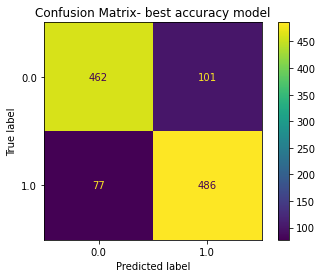

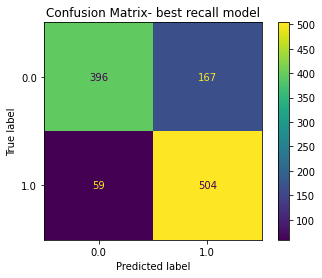

In [9]:
# best params accuracy- n_est: 32, max_depth: 10, reg_alpha: 10.0, reg_lambda: 0
# best params recall- n_est: 16, max_depth: 3, reg_alpha: 1.0, reg_lambda: 100.0

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
rs = 22
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = X.columns

X_val = pd.DataFrame(scaler.transform(X_val))
X_val.columns = X.columns

X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = X.columns

cl = xgboost.XGBClassifier(n_estimators = 32, max_depth = 10, reg_alpha=10, reg_lambda=0, use_label_encoder=False,random_state=rs)
cl.fit(X_train, y_train, eval_metric='logloss')
plot_confusion_matrix(cl,X_test,y_test)
plt.title('Confusion Matrix- best accuracy model')
plt.savefig(f"figs/confusion matrix-best-accuracy", bbox_inches='tight', dpi=600)
plt.show()

cl = xgboost.XGBClassifier(n_estimators = 16, max_depth = 3, reg_alpha=1.0, reg_lambda=100, use_label_encoder=False,random_state=rs)
cl.fit(X_train, y_train, eval_metric='logloss')
plot_confusion_matrix(cl,X_test,y_test)
plt.title('Confusion Matrix- best recall model')
plt.savefig(f"figs/confusion matrix-best-recall", bbox_inches='tight', dpi=600)
plt.show()

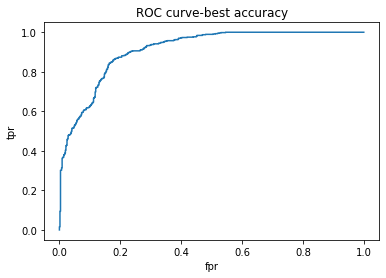

auroc - best accuracy 0.9115213159646527


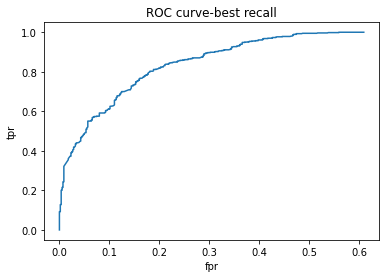

auroc - best recall 0.8966192277478239


In [10]:
# best params accuracy- n_est: 32, max_depth: 10, reg_alpha: 10.0, reg_lambda: 0
# best recall- best params- n_est: 16, max_depth: 3, reg_alpha: 10.0, reg_lambda: 100.0

y = df_master['y']

X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)
rs = 22
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = X.columns

X_val = pd.DataFrame(scaler.transform(X_val))
X_val.columns = X.columns

X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = X.columns

cl = xgboost.XGBClassifier(n_estimators = 32, max_depth = 10, reg_alpha=10, reg_lambda=0, use_label_encoder=False,random_state=rs)
cl.fit(X_train, y_train, eval_metric='logloss')
y_test_pred_proba = cl.predict_proba(X_test)
y_test_pred_proba_c1 = [prob[1] for prob in y_test_pred_proba]
critical_values = np.sort(y_test_pred_proba_c1)

fpr = np.zeros(len(y_test))
tpr = np.zeros(len(y_test))
for i in range(len(critical_values)):
    pred = np.zeros(len(critical_values))
    pred[y_test_pred_proba_c1 > critical_values[i]] = 1
    C = metrics.confusion_matrix(y_test, pred)
    
    tpr[i] = C[1,1]/(C[1,0]+C[1,1])
    fpr[i] = C[0,1]/(C[0,0]+C[0,1])

plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve-best accuracy')
plt.savefig("figs/ROC-curve-best-accuracy", bbox_inches='tight', dpi=600)
plt.show()
print('auroc - best accuracy', roc_auc_score(y_test, y_test_pred_proba_c1))

cl = xgboost.XGBClassifier(n_estimators = 16, max_depth = 3, reg_alpha=1.0, reg_lambda=100, use_label_encoder=False,random_state=rs)

cl.fit(X_train, y_train, eval_metric='logloss')
y_test_pred_proba = cl.predict_proba(X_test)
y_test_pred_proba_c1 = [prob[1] for prob in y_test_pred_proba]
critical_values = np.sort(y_test_pred_proba_c1)

fpr = np.zeros(len(y_test))
tpr = np.zeros(len(y_test))
for i in range(len(critical_values)):
    pred = np.zeros(len(critical_values))
    pred[y_test_pred_proba_c1 > critical_values[i]] = 1
    C = metrics.confusion_matrix(y_test, pred)
    
    tpr[i] = C[1,1]/(C[1,0]+C[1,1])
    fpr[i] = C[0,1]/(C[0,0]+C[0,1])

plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve-best recall')
plt.savefig("figs/ROC-curve-best-recall", bbox_inches='tight', dpi=600)
plt.show()
print('auroc - best recall', roc_auc_score(y_test, y_test_pred_proba_c1))

No handles with labels found to put in legend.


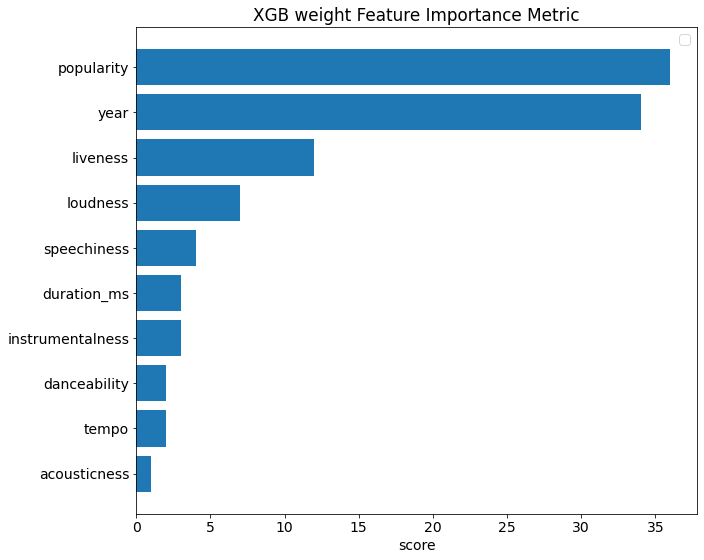

No handles with labels found to put in legend.


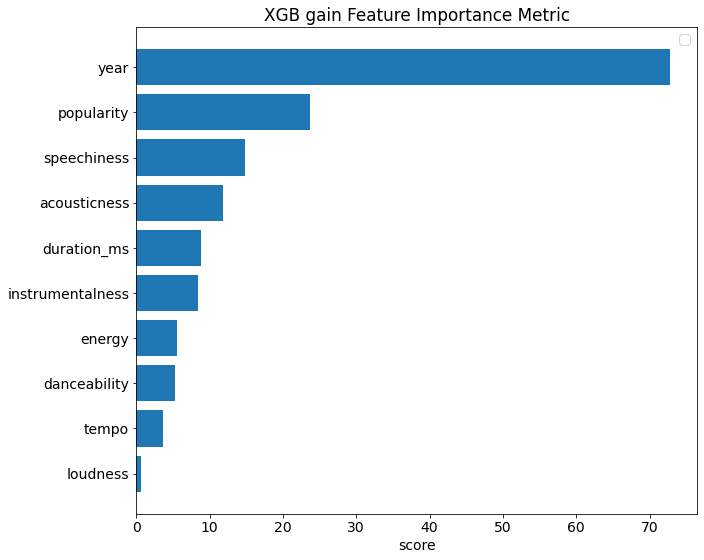

No handles with labels found to put in legend.


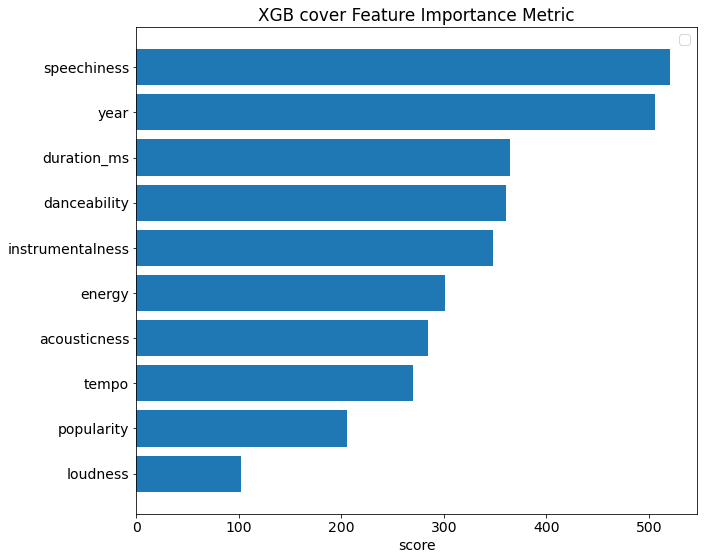

No handles with labels found to put in legend.


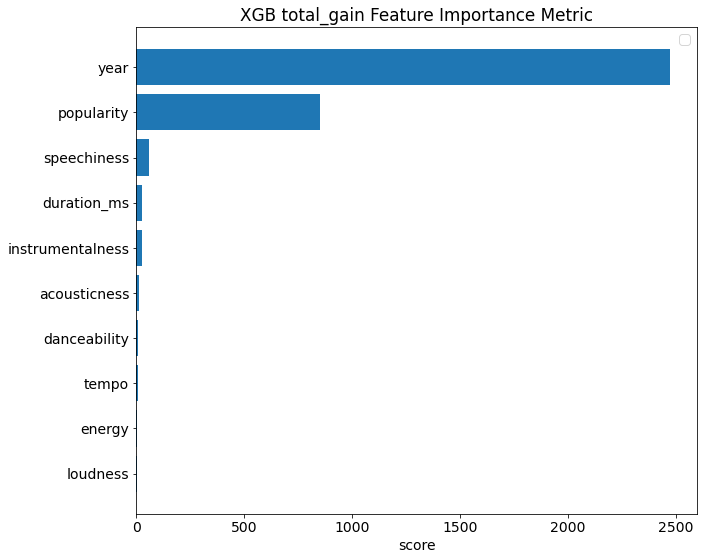

No handles with labels found to put in legend.


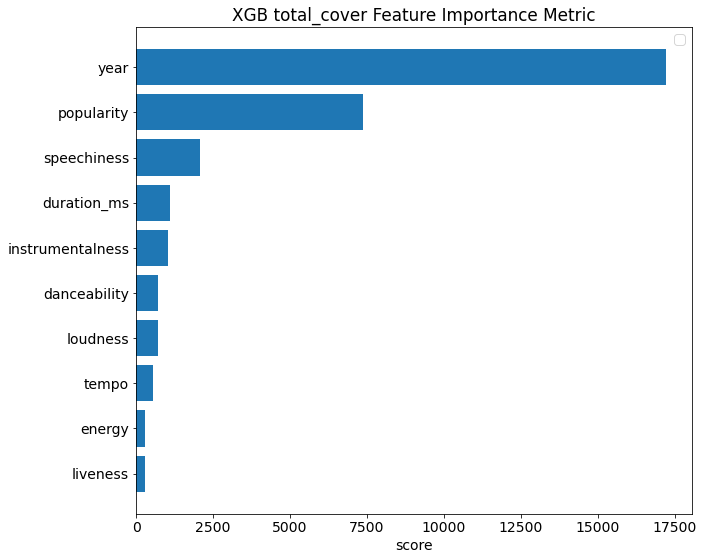

In [11]:
# Using the 5 different types of feature importance measurements offered by XGBoost it seems 
# that year and population are likely the two most important features

for type_ in ['weight', 'gain', 'cover', 'total_gain', 'total_cover']:
    d = cl.get_booster().get_score(importance_type=type_)
    most_imp = sorted(d, key=lambda key: d[key])[-10: : ]

    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(10,8))
    plt.barh([feature for feature in most_imp], [d[feature] for feature in most_imp])
    plt.title(f'XGB {type_} Feature Importance Metric')
    plt.xlabel('score')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"figs/feature-importance{type_}", bbox_inches='tight', dpi=600)
    plt.show()

In [17]:
y = df_master['y']
X = df_master.drop(['artistName', 'trackName', 'y'], axis=1)

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=rs, shuffle = True, stratify= y)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=rs, shuffle = True, stratify= y_other)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = X.columns

X_val = pd.DataFrame(scaler.transform(X_val))
X_val.columns = X.columns

X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = X.columns

np.random.seed(42)
ftr_names = X.columns
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])
cl = xgboost.XGBClassifier(n_estimators = 32, max_depth = 10, reg_alpha=10, reg_lambda=0, use_label_encoder=False,random_state=rs)


#cl = xgboost.XGBClassifier(n_estimators = 16, max_depth = 3, reg_alpha=1, reg_lambda=100, use_label_encoder=False,random_state=rs)
cl.fit(X_train, y_train, eval_metric='logloss')



y_test_pred = cl.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))

for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        y_test_shuffle_pred = cl.predict(X_test_shuffled)
        acc_scores.append(accuracy_score(y_test, y_test_shuffle_pred))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.8419182948490231
test baseline =  0.5
shuffling danceability
   shuffled test score: 0.832 +/- 0.004
shuffling energy
   shuffled test score: 0.837 +/- 0.004
shuffling key
   shuffled test score: 0.841 +/- 0.002
shuffling loudness
   shuffled test score: 0.839 +/- 0.003
shuffling mode
   shuffled test score: 0.843 +/- 0.001
shuffling speechiness
   shuffled test score: 0.811 +/- 0.005
shuffling acousticness
   shuffled test score: 0.837 +/- 0.003
shuffling instrumentalness
   shuffled test score: 0.828 +/- 0.004
shuffling liveness
   shuffled test score: 0.839 +/- 0.003
shuffling valence
   shuffled test score: 0.833 +/- 0.003
shuffling tempo
   shuffled test score: 0.835 +/- 0.005
shuffling duration_ms
   shuffled test score: 0.825 +/- 0.005
shuffling year
   shuffled test score: 0.557 +/- 0.011
shuffling popularity
   shuffled test score: 0.689 +/- 0.014
shuffling explicit
   shuffled test score: 0.842 +/- 0.001


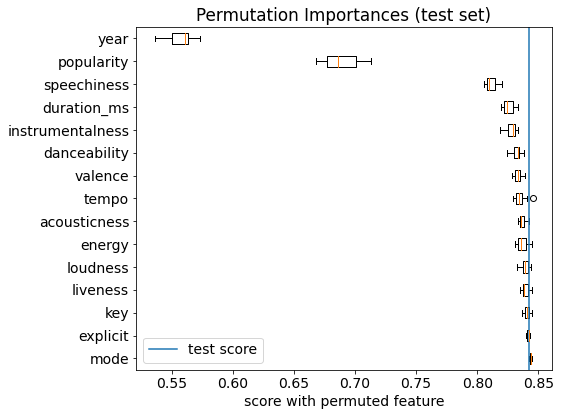

In [19]:
# The permutation feature importance test offers further evidence that year and population are the two most significant features
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with permuted feature')
plt.legend()
plt.tight_layout()
plt.savefig("figs/permutation-feature-imp", bbox_inches='tight', dpi=600)
plt.show()